연습문제
1. 워드임베딩 + 순환신경망 + 규제설정L2
4. 워드 임베딩 + 순환신경망 + Dropout
5. 워드 임베딩 + Dropout 
6. 워드 임베딩 + 양방향 순환신경망

In [45]:
import pandas as pd
from matplotlib import rc
import os

rc('font', family='AppleGothic')

path = '/Users/jsha/gjai/nlp/pytest/'
working_path = path + '18_practice/'
if not os.path.exists(working_path):
    os.mkdir(working_path)
    print(f'making done {working_path}')
os.chdir(working_path)

# 분류1

In [46]:
import pandas as pd
from matplotlib import rc

rc('font', family='AppleGothic')

data_path = '/Users/jsha/gjai/nlp/pytest/16_practice/'
filename1 = '분류1_뉴스데이터_morphed_train.csv'
filename2 = '분류1_뉴스데이터_morphed_test.csv'

train_df = pd.read_csv(data_path+filename1)
test_df = pd.read_csv(data_path+filename2)

In [47]:
# train_df.head()
# train_df['morphed'] = morphed_data
train_df.head()

,id,날짜,분류1,텍스트,분류1_상위,morphed
0,1319794,20190412,"국제,중동_아프리카","이들은 성경이 난민에 대해 어떻게 말하고 있으며, 현 상황과 관련해 난민에 대한 정...",국제,성경 난민 대하 어떻하 말 있 현 상황과 관련 난민 대하 정확 하 팩트 밝히
1,1410943,20190503,"지역,충북",충북 충주시는 3일 충주시청 중앙탑회의실에서 제47회 어버이날 유공자 시상식을 열고...,지역,충북 충주시 충주시 청 중앙 탑 회의실 어버이날 유공자 시상식 열 심영섭 효행 장한...
2,972814,20190122,"스포츠,축구,국가대표팀","아시안게임이 U-23 대표팀 경기로 A 대표팀과는 객관적 지표에서 차이가 있지만, ...",스포츠,아시안게임 대표 팀 경기 대표 팀 객관적 지표 차이 있 그때 기억 황의 조의 자신감...
3,359452,20180828,"IT_과학,콘텐츠","신기술전시회 280개 기업, 국제발명특허대전 160개 발명품, 국제컨퍼런스 40개 ...",IT_과학,신기술 전시회 기업 국제 발명 특허 대전 발명품 국제 컨퍼런스 세션 꾸미 명 관람객...
4,1338926,20190416,"사회,장애인","아카데미에서는 장애인복지시설, 발달장애인훈련센터 등 학령기 장애인 대상으로의 진로직...",사회,아카데미 장애인 복지 시설 발달 장애 훈련 센터 학령기 장애인 대상 진로 직업 체험...


In [48]:
test_df.head()

,id,날짜,분류1,텍스트,분류1_상위,morphed
0,268980,20180806,"경제,증권_증시",이런 가격 조작 행위는 지난해 말 ‘코인 열풍’이 불 때부터 폭발적으로 늘어났다는 ...,경제,이런 가격 조작 행위 지난해 말 코인 열풍 불 때 폭발적 늘어나 설명
1,260551,20180803,"국제,러시아",한 정보 소식통에 따르면 이 여성은 지난해 중순쯤 국무부로부터 비밀정보 사용 인가를...,국제,하 정보 소식통 따르 이 여성 지난해 중순쯤 국무부 비밀 정보 사용 인가 취소 당하...
2,390392,20180903,"국제,아시아",시진핑(習近平) 중국 국가주석은 오는 11월 파푸아뉴기니에서 열리는 아시아·태평양경...,국제,시진 핑 중국 국가주석 오 파푸아뉴기니 열리 아시아 태평양 경제 협력체 정상 회의 ...
3,215899,20180723,"경제,무역",이번 세이프가드는 최근 3년간 평균 수입물량으로 쿼터를 산정 후 쿼터 초과 수입물량...,경제,이번 세이프가드 최근 평균 수입 물량 쿼터 산정 후 쿼터 초과 수입 물량 대하 관세...
4,380078,20180902,"스포츠,축구,국가대표팀","손흥민과 이승우, 황의조와 황희찬 등 해외에서 활약하는 선수들은 더 이상 병역 문제...",스포츠,손 흥 민 이승우 황의 황희찬 해외 활약 선수 더 이상 병역 문제 발목 잡히 국내 ...


In [49]:
from sklearn.model_selection import train_test_split

data_text = train_df.loc[:,'morphed'].to_list()
data_label = train_df.loc[:,'분류1_상위'].to_list()
print(data_label[:3])
print(data_text[:3])

print('-'*50)

data_text_test = test_df.loc[:,'morphed'].to_list()
data_label_test = test_df.loc[:,'분류1_상위'].to_list()
print(data_label_test[:3])
print(data_text_test[:3])

train_data_text = data_text
train_data_label = data_label
test_data_text = data_text_test
test_data_label = data_label_test
# train_data_text, test_data_text, train_data_label, test_data_label = \
# train_test_split(data_text, data_label, stratify=data_label, 
#                  test_size=0.3, random_state=1111)

['국제', '지역', '스포츠']
['성경 난민 대하 어떻하 말 있 현 상황과 관련 난민 대하 정확 하 팩트 밝히', '충북 충주시 충주시 청 중앙 탑 회의실 어버이날 유공자 시상식 열 심영섭 효행 장한 어버이 표창장 수여', '아시안게임 대표 팀 경기 대표 팀 객관적 지표 차이 있 그때 기억 황의 조의 자신감 불태우 충분']
--------------------------------------------------
['경제', '국제', '국제']
['이런 가격 조작 행위 지난해 말 코인 열풍 불 때 폭발적 늘어나 설명', '하 정보 소식통 따르 이 여성 지난해 중순쯤 국무부 비밀 정보 사용 인가 취소 당하 직후 해고 되', '시진 핑 중국 국가주석 오 파푸아뉴기니 열리 아시아 태평양 경제 협력체 정상 회의 전후 태평 도서 국 정상 회담 알리']


In [50]:
print(len(train_data_text))
print(len(test_data_text))

6792
2265


In [51]:
from collections import Counter
train_data_label_freq = Counter(train_data_label)
print('train_data_label_freq:', train_data_label_freq)

test_data_label_freq = Counter(test_data_label)
print('test_data_label_freq:', test_data_label_freq)


train_data_label_freq: Counter({'지역': 2151, '스포츠': 1725, '경제': 945, '국제': 733, '사회': 639, 'IT_과학': 491, '문화': 98, '미분류': 9, '정치': 1})
test_data_label_freq: Counter({'지역': 722, '스포츠': 540, '경제': 329, '국제': 219, '사회': 213, 'IT_과학': 203, '문화': 30, '미분류': 9})


In [52]:
import numpy as np

text_len = [len(line.split(' ')) for line in train_data_text]
print('최소길이:', np.min(text_len))
print('최대길이:', np.max(text_len))
print('평균길이:', np.round(np.mean(text_len),1))
print('중위수길이:', np.median(text_len))
print('percentile  : [0, 25, 50, 75, 90, 99, 100]')
print('구간별 최대 길이:', np.percentile(text_len, [0, 25, 50, 75, 90, 99, 100]))
print('최소길이 문장:', train_data_text[np.argmin(text_len)])
print('최대길이 문장:', train_data_text[np.argmax(text_len)])

최소길이: 4
최대길이: 54
평균길이: 19.5
중위수길이: 19.0
percentile  : [0, 25, 50, 75, 90, 99, 100]
구간별 최대 길이: [ 4. 16. 19. 22. 27. 35. 54.]
최소길이 문장: 투입 예산 내년 총
최대길이 문장: 주요 신규 사업 삼사해상공원 해 파랑 공원 파도 걷기 보행 조성 새 뜰 사업 축산 블루 시티 조성 사업 예 주 고을 역사 문화 공원 조성 사업 오십천 그린 로드 조성 영덕 도서관 건립 사업 영덕 애니메이션 테마파크 조성 사업 영덕 하 양교 션 강구면 화전 우수 저류 시설 설치 아름답 소하천 꾸 사업


In [53]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np
import math 

max_words = 10000
maxlen = 40

tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(train_data_text)
word_index = tokenizer.word_index

In [54]:
print('wjscpdptj %s개의 고유한 토큰을 찾았습니다' % len(word_index))
print('word_index type:', type(word_index))
# print('word_index:', word_index)

wjscpdptj 18050개의 고유한 토큰을 찾았습니다
word_index type: <class 'dict'>


In [55]:
seq_data = tokenizer.texts_to_sequences(train_data_text)
# print('data', data)

len_d = [len(d) for d in seq_data]
# print('길이:', len_d)
print('최대 문장 길이:', max(len_d))
print('최소 문장 길이:', min(len_d))

최대 문장 길이: 49
최소 문장 길이: 4


In [56]:
pad_data = pad_sequences(seq_data, maxlen=maxlen)

print('data:', pad_data)
print('data 0:', pad_data[0])
print('data 0의 길이:', len(pad_data[0]))

data: [[   0    0    0 ...    1 7165   18]
 [   0    0    0 ... 7168 7169 2108]
 [   0    0    0 ... 3970 4700 1797]
 ...
 [   0    0    0 ... 9362 5861   18]
 [   0    0    0 ... 1042 1564   13]
 [   0    0    0 ... 9916 3268  362]]
data 0: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0 2300  677   10
 2301  220    3  790 4698   76  677   10 1389    1 7165   18]
data 0의 길이: 40


In [57]:
print('train_data_text type:', type(train_data_text))
print('data type:', type(pad_data))
print('train_data_text 0:', train_data_text[0])
print('data 0:', pad_data[0])

train_data_text type: <class 'list'>
data type: <class 'numpy.ndarray'>
train_data_text 0: 성경 난민 대하 어떻하 말 있 현 상황과 관련 난민 대하 정확 하 팩트 밝히
data 0: [   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0 2300  677   10
 2301  220    3  790 4698   76  677   10 1389    1 7165   18]


In [58]:
def to_one_hot(sequences, dimension):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

# x_train = to_one_hot(pad_data, dimension=max_words)
x_train = pad_data

In [59]:
# print('train_data_text type:', type(train_data_text))
# print(len(train_data_text[0]))
# print('texts 0:', train_data_text[0])

# print('data type:', type(x_train))
# print(len(x_train[0]))
# print('x_train [0][0:100]:', x_train[0][:100])

In [60]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(train_data_label)
print(le.classes_)
train_data_label = le.transform(train_data_label)

['IT_과학' '경제' '국제' '문화' '미분류' '사회' '스포츠' '정치' '지역']


In [61]:
test_data_label = le.transform(test_data_label)

In [62]:
class_number = len(le.classes_)
y_train = to_one_hot(train_data_label, dimension=class_number)
print(y_train)

[[0. 0. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [63]:
data_test = tokenizer.texts_to_sequences(test_data_text)

data_test = pad_sequences(data_test, maxlen=maxlen)

x_test = data_test

y_test = to_one_hot(test_data_label, dimension=class_number)
print(y_test)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 1. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]]


In [64]:
print('훈련 데이터 본문 텐서의 크기:', x_train.shape)
print('훈련 데이터 레이블 텐서의 크기:', y_train.shape)

print('테스트 데이터 본문 텐서의 크기:', x_test.shape)
print('테스트 데이터 레이블 텐서의 크기:', y_test.shape)

훈련 데이터 본문 텐서의 크기: (6792, 40)
훈련 데이터 레이블 텐서의 크기: (6792, 9)
테스트 데이터 본문 텐서의 크기: (2265, 40)
테스트 데이터 레이블 텐서의 크기: (2265, 9)


In [65]:
y_train.shape

(6792, 9)

In [66]:
!pwd

/Users/jsha/gjai/nlp/pytest/18_practice


## we+LSTM+dropout

In [67]:
import os

class_number = y_train.shape[-1]
epochs = 10
batch_size = 50
embedding_dim = 200
model_name = '분류1_we_lstm_TextCNN_model.h5'
tokenizer_name = '분류1_we_lstm_TextCNN_token.pickle'
labelencode_name = '분류1_we_lstm_TextCNN_le.pickle'

# working_path = '/Users/jsha/gjai/nlp/pytest/15_working/'
# save_path = working_path + 'practice/'
# if not os.path.exists(save_path):
#     os.mkdir(save_path)
#     print(f'made {save_path} directory')
# os.chdir(save_path)

In [69]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras import layers
from keras import regularizers

model = Sequential()

model.add(layers.Embedding(input_dim=max_words, output_dim=embedding_dim, 
                          input_length=maxlen))


model.add(layers.Conv1D(128, kernel_size=(3,), activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Dropout(0.25))

model.add(layers.Conv1D(64, kernel_size=(3,), activation='relu'))
model.add(layers.MaxPooling1D(pool_size=2))
model.add(layers.Dropout(0.25))

model.add(layers.LSTM(32))
model.add(Dropout(0.5))

model.add(Dense(units=16, activation='relu'))
model.add(Dense(units=class_number, activation='softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 40, 200)           2000000   
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 38, 128)           76928     
_________________________________________________________________
max_pooling1d_3 (MaxPooling1 (None, 19, 128)           0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 19, 128)           0         
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 17, 64)            24640     
_________________________________________________________________
max_pooling1d_4 (MaxPooling1 (None, 8, 64)             0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 8, 64)            

In [70]:
from keras.callbacks import EarlyStopping
import os

checkpoint_path = working_path
# checkpoint_dir = os.path.dirname(checkpoint_path)
if os.path.exists(checkpoint_path):
    print('{} --- Folder already exists\n'.format(checkpoint_path))
else:
    os.makedirs(checkpoint_path, exist_ok=True)
    print('{} --- Folder created\n'.format(checkpoint_path))

/Users/jsha/gjai/nlp/pytest/18_practice/ --- Folder already exists



In [71]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy',
             metrics=['acc'])

In [72]:
from keras.callbacks import ModelCheckpoint

# earlystop_callback = EarlyStopping(monitor='val_acc', patience=2)
cp_callback = ModelCheckpoint(filepath=checkpoint_path+model_name,
                             monitor='val_acc', verbose=1, 
                             save_best_only=True)
history = model.fit(x_train, y_train, epochs=epochs,
                   batch_size=batch_size, validation_split=0.3,
                   callbacks=[cp_callback], verbose=1)
history_dict = history.history

/Users/jsha/opt/anaconda3/envs/nlp3710/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 4754 samples, validate on 2038 samples
Epoch 1/10
4754/4754 [==============================] - 10s 2ms/step - loss: 1.8072 - acc: 0.2913 - val_loss: 1.6495 - val_acc: 0.3224

Epoch 00001: val_acc improved from -inf to 0.32237, saving model to /Users/jsha/gjai/nlp/pytest/18_practice/분류1_we_lstm_TextCNN_model.h5
Epoch 2/10
4754/4754 [==============================] - 8s 2ms/step - loss: 1.2548 - acc: 0.5890 - val_loss: 1.1406 - val_acc: 0.6129

Epoch 00002: val_acc improved from 0.32237 to 0.61286, saving model to /Users/jsha/gjai/nlp/pytest/18_practice/분류1_we_lstm_TextCNN_model.h5
Epoch 3/10
4754/4754 [==============================] - 9s 2ms/step - loss: 0.9236 - acc: 0.6613 - val_loss: 1.1016 - val_acc: 0.6261

Epoch 00003: val_acc improved from 0.61286 to 0.62610, saving model to /Users/jsha/gjai/nlp/pytest/18_practice/분류1_we_lstm_TextCNN_model.h5
Epoch 4/10
4754/4754 [==============================] - 8s 2ms/step - loss: 0.7693 - acc: 0.7061 - val_loss: 1.1501 - val_acc: 0.

In [78]:
import pickle

# model.save(model_name)

with open(checkpoint_path+atokenizer_name, 'wb') as file:
    pickle.dump(tokenizer, file, protocol=pickle.HIGHEST_PROTOCOL)
    

### 결과

In [74]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

# acc_list.append(acc)
# val_acc_list.append(val_acc)
# loss_list.append(loss)
# val_loss_list.append(val_loss)

print('validation accuracy of each epoch:', np.round(val_acc,3))
epochs = range(1, len(val_acc)+1)
print('validation loss of each epoch:', np.round(val_loss,3))

validation accuracy of each epoch: [0.322 0.613 0.626 0.634 0.666 0.685 0.694 0.692 0.691 0.696]
validation loss of each epoch: [1.65  1.141 1.102 1.15  1.29  1.173 1.317 1.367 1.534 1.711]


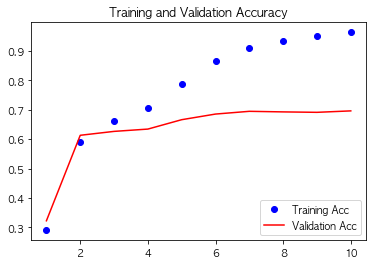

In [75]:
import matplotlib.pyplot as plt

plt.plot(epochs, acc, 'bo', label='Training Acc')
plt.plot(epochs, val_acc, 'r', label='Validation Acc')
plt.title('Training and Validation Accuracy')
plt.legend(loc=4)
plt.show()

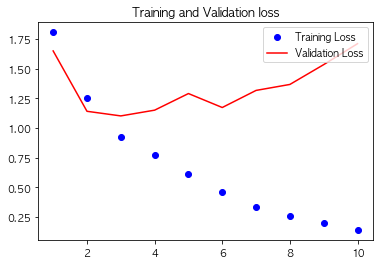

In [76]:
plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation loss')
plt.legend(loc=1)
plt.show()

In [79]:
from keras.models import load_model

loaded_model = load_model(checkpoint_path+model_name)

# with open(checkpoint_path+tokenizer_name, 'rb') as handle:
#     loaded_tokenizer = pickle.load(handle)

/Users/jsha/opt/anaconda3/envs/nlp3710/lib/python3.7/site-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


In [80]:
test_eval = loaded_model.evaluate(x_test, y_test)

print('prediction')
print('prediction model loss & acc:', test_eval)

2265/2265 [==============================] - 1s 587us/step
prediction
prediction model loss & acc: [1.6900235024509052, 0.6887417435646057]


In [ ]:
a